# RE: [Bug: Monthly NTD Ridership data miscalculation #1612](https://github.com/cal-itp/data-analyses/issues/1612)

current `01_ntd_ridership_utils.get_percent_change`
uses `(new-old)/new` logic for %change calc

```
def get_percent_change(
    df: pd.DataFrame,
    change_col: str
) -> pd.DataFrame:
    """
    updated to work with the warehouse `dim_monthly_ntd_ridership_with_adjustments` long data format. Used with add_change_col to make a new column to calc % change from previous period.
    
    """
    df["pct_change_1yr"] = (
        (df["upt"] - df[change_col])
        .divide(df["upt"])
        .round(4)
    )
    
    return df
```

updated current `01_ntd_ridership_utils.get_percent_change`
uses `(new-old)/OLD` logic for %change calc

updated to `.divide(df[change_col])`

```
def get_percent_change_2(
    df: pd.DataFrame,
    change_col: str
) -> pd.DataFrame:
    """
    updated to work with the warehouse `dim_monthly_ntd_ridership_with_adjustments` long data format. Used with add_change_col to make a new column to calc % change from previous period.
    
    """
    df["pct_change_1yr"] = (
        (df["upt"] - df[change_col])
        .divide(df[change_col])
        .round(4)
    )
    
    return df
```

Made updates to `get_percent_change` function in `01_ntd_ridership_utils`
Checking if chagnes worked

In [1]:
import sys
sys.path.append("../")  # up one level
import _01_ntd_ridership_utils

In [2]:
df = _01_ntd_ridership_utils.produce_ntd_monthly_ridership_by_rtpa("2025", "May")
print(df.columns)

both          29370
left_only         0
right_only        0
Name: _merge, dtype: int64
Index(['ntd_id', 'agency', 'reporter_type', 'period_year_month', 'period_year',
       'period_month', 'mode', 'tos', 'Status', 'uza_name', 'upt',
       'source_agency', 'last_report_year', 'ntd_id_2022', 'rtpa_name',
       '_merge', 'previous_y_m_upt', 'change_1yr', 'pct_change_1yr',
       'Mode_full', 'TOS_full'],
      dtype='object')


/home/jovyan/data-analyses/ntd/monthly_ridership_report/../_01_ntd_ridership_utils.py:45: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.shift(1))


In [7]:
# dataframe after corrected function
df[
    (df["ntd_id"]=="90043")
    & (df["period_month"]==3)
    & (df["period_year"].isin([2024,2025]))
    & (df["mode"]=="MB")
    & (df["tos"]=="DO")
].head().sort_values(by="period_year",ascending=True) 

,ntd_id,agency,reporter_type,period_year_month,period_year,period_month,mode,tos,Status,uza_name,...,source_agency,last_report_year,ntd_id_2022,rtpa_name,_merge,previous_y_m_upt,change_1yr,pct_change_1yr,Mode_full,TOS_full
20363,90043,City of Commerce,Full Reporter,2024-03,2024,3,MB,DO,Active,"Los Angeles--Long Beach--Anaheim, CA",...,City of Commerce (CCT) - Transportation,2023,90043,Los Angeles County Metropolitan Transportation...,both,38829.0,9421.0,0.2426,Bus,Directly Operated
20350,90043,City of Commerce,Full Reporter,2025-03,2025,3,MB,DO,Active,"Los Angeles--Long Beach--Anaheim, CA",...,City of Commerce (CCT) - Transportation,2023,90043,Los Angeles County Metropolitan Transportation...,both,48250.0,-14985.0,-0.3106,Bus,Directly Operated


Previous, incorrectly calculated value for City of Commerce May 2025, pct_change_1yr = `-0.4505`

after updating, pct_change_1yr = `-0.3106`

Results match the manual calculation from the excel data sheet
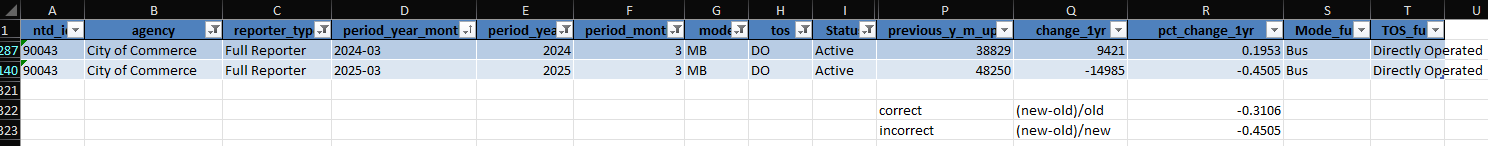